In [2]:
import pandas as pd


data = pd.read_csv(r'C:\Users\Acer\Desktop\ERMC Shishir\Tensorflow 2.0\Manitoba_assignments\sta_temperature.csv')


print(data.head())


   date  station A  station B
0     0         19         28
1     1         25         28
2     2         22         26
3     3         -1         19
4     4          4         16


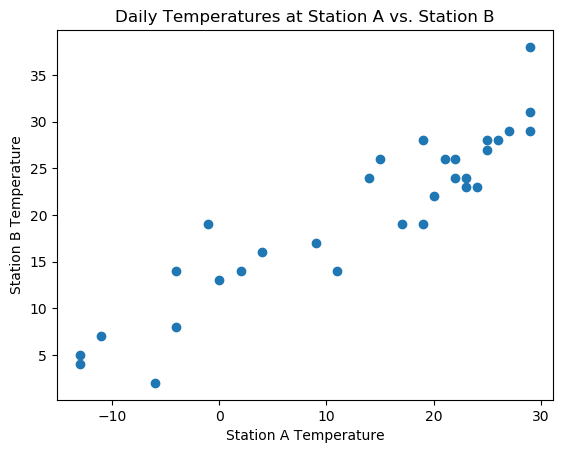

In [3]:
import matplotlib.pyplot as plt


plt.scatter(data['station A'], data['station B'])
plt.xlabel('Station A Temperature')
plt.ylabel('Station B Temperature')
plt.title('Daily Temperatures at Station A vs. Station B')
plt.show()


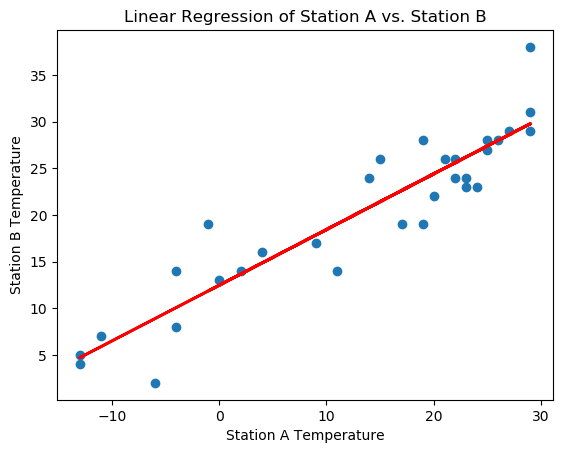

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression


X = data['station A'].values.reshape(-1, 1)
y = data['station B'].values


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)

plt.scatter(data['station A'], data['station B'])
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Station A Temperature')
plt.ylabel('Station B Temperature')
plt.title('Linear Regression of Station A vs. Station B')
plt.show()


In [25]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


X_const = sm.add_constant(X)
print (X_const)


model_sm = sm.OLS(y, X_const).fit()


predictions = model_sm.get_prediction(X_const)
pred_int = predictions.summary_frame(alpha=0.05)

pred_int


[[  1.  19.]
 [  1.  25.]
 [  1.  22.]
 [  1.  -1.]
 [  1.   4.]
 [  1.  14.]
 [  1.  21.]
 [  1.  22.]
 [  1.  23.]
 [  1.  27.]
 [  1.  29.]
 [  1.  25.]
 [  1.  29.]
 [  1.  15.]
 [  1.  29.]
 [  1.  24.]
 [  1.   0.]
 [  1.   2.]
 [  1.  26.]
 [  1.  17.]
 [  1.  19.]
 [  1.   9.]
 [  1.  20.]
 [  1.  -6.]
 [  1. -13.]
 [  1. -13.]
 [  1. -11.]
 [  1.  -4.]
 [  1.  -4.]
 [  1.  11.]
 [  1.  23.]]


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.810278,0.675442,22.428845,25.191711,16.655980,30.964576
1,27.394750,0.827574,25.702171,29.087328,20.173916,34.615584
2,25.602514,0.742627,24.083671,27.121357,18.420418,32.784610
3,11.862039,0.891612,10.038487,13.685591,4.609387,19.114691
4,14.849099,0.742627,13.330256,16.367942,7.667003,22.031195
5,20.823218,0.618158,19.558943,22.087494,13.690616,27.955820
6,25.005102,0.717985,23.536657,26.473547,17.833495,32.176709
7,25.602514,0.742627,24.083671,27.121357,18.420418,32.784610
8,26.199926,0.769235,24.626664,27.773187,19.006125,33.393727
9,28.589574,0.891612,26.766022,30.413125,21.336921,35.842226


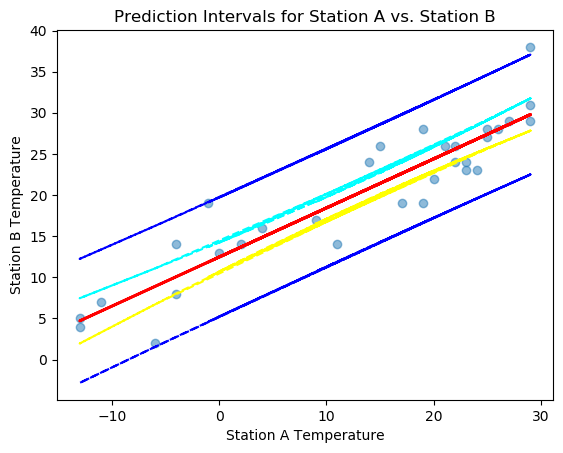

In [27]:

plt.scatter(data['station A'], data['station B'], alpha=0.5)
plt.plot(data['station A'], y_pred, color='red', linewidth=2)
plt.plot(data['station A'], pred_int['obs_ci_lower'], color='blue', linestyle='--')
plt.plot(data['station A'], pred_int['obs_ci_upper'], color='blue', linestyle='--')
#plt.plot(data['station A'], pred_int['mean_ci_lower'], color='yellow', linestyle='--')
#plt.plot(data['station A'], pred_int['mean_ci_upper'], color='cyan', linestyle='--')
plt.xlabel('Station A Temperature')
plt.ylabel('Station B Temperature')
plt.title('Prediction Intervals for Station A vs. Station B')
plt.show()

[[22.4288449  25.19171121]
 [25.70217122 29.0873281 ]
 [24.08367077 27.12135694]
 [10.03848746 13.6855913 ]
 [13.33025596 16.36794213]
 [19.55894298 22.08749379]
 [23.53665725 26.4735466 ]
 [24.08367077 27.12135694]
 [24.62666447 27.77318711]
 [26.76602161 30.41312544]
 [27.82054643 31.74824836]
 [25.70217122 29.0873281 ]
 [27.82054643 31.74824836]
 [20.14589084 22.6953698 ]
 [27.82054643 31.74824836]
 [25.16604059 28.42863485]
 [10.70268566 14.21621696]
 [12.02297805 15.28557231]
 [26.23539594 29.74892724]
 [21.29969032 23.93121805]
 [22.4288449  25.19171121]
 [16.52039485 19.15192258]
 [22.98519658 25.8301834 ]
 [ 6.68714827 11.06281115]
 [ 1.94058936  7.44560298]
 [ 1.94058936  7.44560298]
 [ 3.30128541  8.47455467]
 [ 8.03290309 12.10670406]
 [ 8.03290309 12.10670406]
 [17.7562431  20.30572206]
 [24.62666447 27.77318711]]


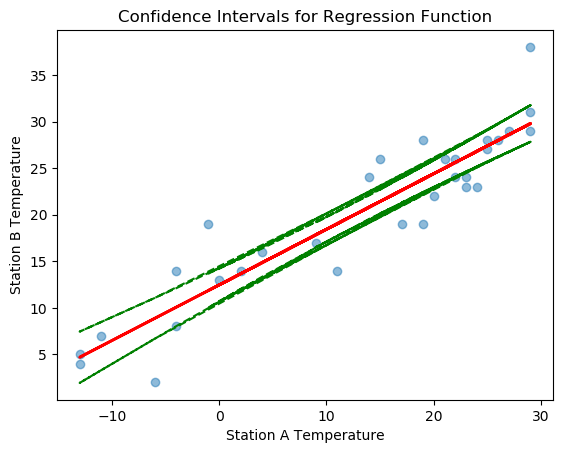

In [26]:
# Get confidence intervals
conf_int = predictions.conf_int()
print(conf_int)


plt.scatter(data['station A'], data['station B'], alpha=0.5)
plt.plot(data['station A'], y_pred, color='red', linewidth=2)
plt.plot(data['station A'], conf_int[:, 0], color='green', linestyle='--')
plt.plot(data['station A'], conf_int[:, 1], color='green', linestyle='--')
plt.xlabel('Station A Temperature')
plt.ylabel('Station B Temperature')
plt.title('Confidence Intervals for Regression Function')
plt.show()
